## **Introduction**

Wine is one of the most popular alcoholic beverages in the world, with a great range between the cheapest and the most expensive wines. The project’s main objective is to determine which chemical characteristics determine wine quality to predict the quality of a new sample. Question: What characteristics best determine the quality of wine and how accurate is the model to predict wine quality? Answering this question would assist both customers and sellers to more accurately price wine bottles based on their “Intrinsic Quality” levels, while it would allow customers to purchase quality wine at the lowest possible cost. The dataset we are using for the project consists information about chemical composition of each wine as well as information about that wine’s quality. The dataset was created and maintained by M Yasser H and the method for collection of data is google research. The dataset contains 1598 observations, 11 quantitative variables, and 1 categorical variable. The variables include density, pH values, sugar level, and other quantitative variables. The categorical variable that we are using is “quality”, which is represented on the scale from 0 to 10, where the min value observed is 3 and the max value observed is 8. The initial model is based on the report made by Nimit Dhalia, “The Effect of Physicochemical on The Wine Quality,” which states that red wine quality tends to depend on volatile acidity, alcohol, total sulfur dioxide, and sulphites whereas white wine quality depends on density rather than sulphites. Since the dataset does not show whether the wine is white or red, variables from both categories will be used in the initial model.

### *Objective*
1. To figure out which Variables have strong correlations with Wine Quality
    1. Compare to the Initial Hypothesis that Wine Quality depends on 
        - Volatile Acidity
        - Alcohol Level
        - Total Sulful Dioxide
        - Sulphites Level
2. Run Classification and Regression Analysis on the Dataset
    1. Determine the best accuracy of the model
3. Discuss the analysis and propose future implications


### ***Methods***

For our analysis on the relationship between wine quality and chemical factors of wine, we began by loading several packages that we would be using, and reading in the data set. We then began our analysis.

The first step in our analysis was to split the data into training and testing sets using a 0.75:0.25 split. We chose 75:25 becasue we wanted to have more data in our training set than testing set to get an accurate model, but not so much more that the testing set would lose accuracy.

For our exploratory analysis we looked at several variables that could potentially impact the quality of the wine. Based on the paper mentioned above we decided to test out the predictors volatile acidity, alcohol, total sulfur dioxide, sulphites, and density. 

We first used the ggpairs and ggcorr functions to access correlations and see if they matched up with the paper.

GGpairs is a function that creates a graph that plot sscatter plots of all variables together. It shows which variables have correlations together.


The GGPAIRS, Graph. **##** shows the following correlations: 

1. Fixed Acid - Citric Acid 
2. Fixed Acid - Density 
3. Fixed Acid - pH
4. Free Sulfur Dioxide - Total Sulfur Dioxide 

GGcorr is a function that puts GGpairs in a more visually pleasing view - darker colors represent stronger correlations.

The GGCORR,  Graph. **##** shows that the following variables show the greatest correlation with Quality
 1. Citric Acid 
 2. Fixed Acid
 3. Total Sulfur Dioxide
 4. Free Sulfur Dioxide 
 5. Sulphates 
 6. Alcohol 
 7. Volatile Acidity
 
This lined up very well with what we learned from the paper, and we decided to continue our exploration based on the variables shown in the paper.

We decided to look at how the average for each of the predictors changed with quality. To do this, we created a table (**table X**) containing both the quality rating and the median predictor values for each observation. We used median rather than mean to decrease the effect of outliers we believed might be present. We also graphed the median values for each predictor (Graphs 1-5) to make visualization of the results easier. We saw that there appeared to be a correlation between quality and each one of the predictors, although in Graph 3, the correlation appeared to be nonlinear.

Since we had previously graphed the averages rather than all the data points, we wanted to make sure we could still see a correlation when we visualized all the training data rather than just the averages. We chose two of our predictors (Sulphates and Volatile Acidity) to visualize in greater depth (Graph 6). Based on this, we were able to see that there was still a trend between quality and the visualized predictors, for example higher quality wines had lower volatile acidity. 

Next we wanted to investigate the distribution of wine qualities in the data set. We created a histogram-like bar graph of the number of observations for each quality rating. 

Unfortunately, we found that the distribution was very unbalanced, with many wines of medium quality, and very few wines of high or low quality. We attempted to fix this using upsampling, however we had issues loading the themis package which contains this function. This category unbalance may cause our model to have lower accuracy. 

Once we had decided on which predictors to use, we created a model to tune for our best K, and a recipe in which we centered and scaled our predictors. We performed a 5 fold cross validation in order to test the tuning parameter on multiple different validation sets. We chose 5 folds rather than 10 because we did not have the computing power for 10 folds, and running 10 fold cross validation would take too long. We used our cross validation, along with our model and recipe in a workflow. 

We collected the accuracy metrics, which we graphed in order to find the k value that optimized accuracy (**Graph X**). Based on our graph, the best number of neighbors was k=**XX**. 

### ***Predictions:***

Let us predict class labels for our wine test data set. we use the bind_cols to add the columns to add the column of the predictions to wine test data set, creating the wine_test_predictions data frame. the quality variables contain the true quality and the .pred_class contains the predicted quality of the wine from the classifier. 

Then, we computed the accuracy of the wine quality predictions. To assess the accuracy of classification, we use metric function the package of tidymodels to get the statistics about wine quality of our model, specifying the truth and estimate arguments. In the metrics data frame, we filitered the .metric column since we are interested in accuracy row. From the table, we can see the value of the .estimate variable shows that the estimated accuracy of the accuracy of the classifier on the wine test data set 58.26%

After the accuracy of the model level, the visualizations and the confusion matrix, we can find that the wine quality have the relationship with acidity of the wine and sulphates. As the acidity of the wine increasing, the wine qulaity will be decreasing. However, when sulphate is increased, the wine quality will be increasing. 

The results could help wineries improve their wines, for example by reducing their acidity. Our analysis also leads to further questions, such as which ingredients in a wine increase its acidity, what other factors affect the quality of the wine.


### ***Discussion***

1. Results
Results of the model is the accuracy wih which it could predict the quality of Wine based on the main 5 variables. The accuracy turned out to be at 61%, which is not too bad considering that it predicts a value from 10 options (compared to True-False response). A low accuracy was somewhat expected, as the valuations of quality are subjective and based on expertise valuation. Nonetheless, this model, even if not accurately predict, would allow pro get a rough estimate of the quality of wine. 

2. Implications:
This model would allow winemakers to more accurately evaluate their wine quality and price their wine accordingly. There would be a lower difference between price and quality in the wine industry, as customers would stop buying overpriced wine and winemakers would raise prices for quality wine. 

3. Future Research 
As the dataset did not mention price of each wine, finding prices and seeing whether there is a great difference in price range and quality. A possible research question could be: After which price point


### ***Reference***

Nimit Dhalia “The Effect of Physicochemical on The Wine Quality”
https://rpubs.com/nimit/Report

Dataset 
Wine Quality Dataset 
M Yasser H 
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset



In [1]:
#attach packages
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
dataset <- read_csv("https://drive.google.com/uc?export=download&id=1m1oh8R2D0EGajeNJdoHUu-jHjQy3w_3e")
#renames the columns and gets rid of the spaces
colnames(dataset)<- c('fix_acid','vol_acid','citric_acid','resid_sugar',
                      'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
                      'pH','sulphates','alcohol','quality','id')
upd <- dataset %>%
#turns quality variable into a factor
         mutate(quality = as_factor(quality))

#moves ID column at the beginning 
wine <- upd[,c(13,12,1,2,3,4,5,6,7,8,9,10,11)]%>%
        select(-id)
head(wine,6)
tail(wine,6)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
5,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8
5,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8
6,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4


quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,5.4,0.740,0.09,1.7,0.089,16,26,0.99402,3.67,0.56,11.6
6,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0
6,6.8,0.620,0.08,1.9,0.068,28,38,0.99651,3.42,0.82,9.5
5,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5
6,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2
5,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2


Here we are splitting the dataset into training and testing, with 0.75 proportion and strata as quality. This is done to successfully run the Classification Analysis on the dataset.

In [3]:
#set seed (only once)
set.seed(1234)
wine_split <- initial_split(wine, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)


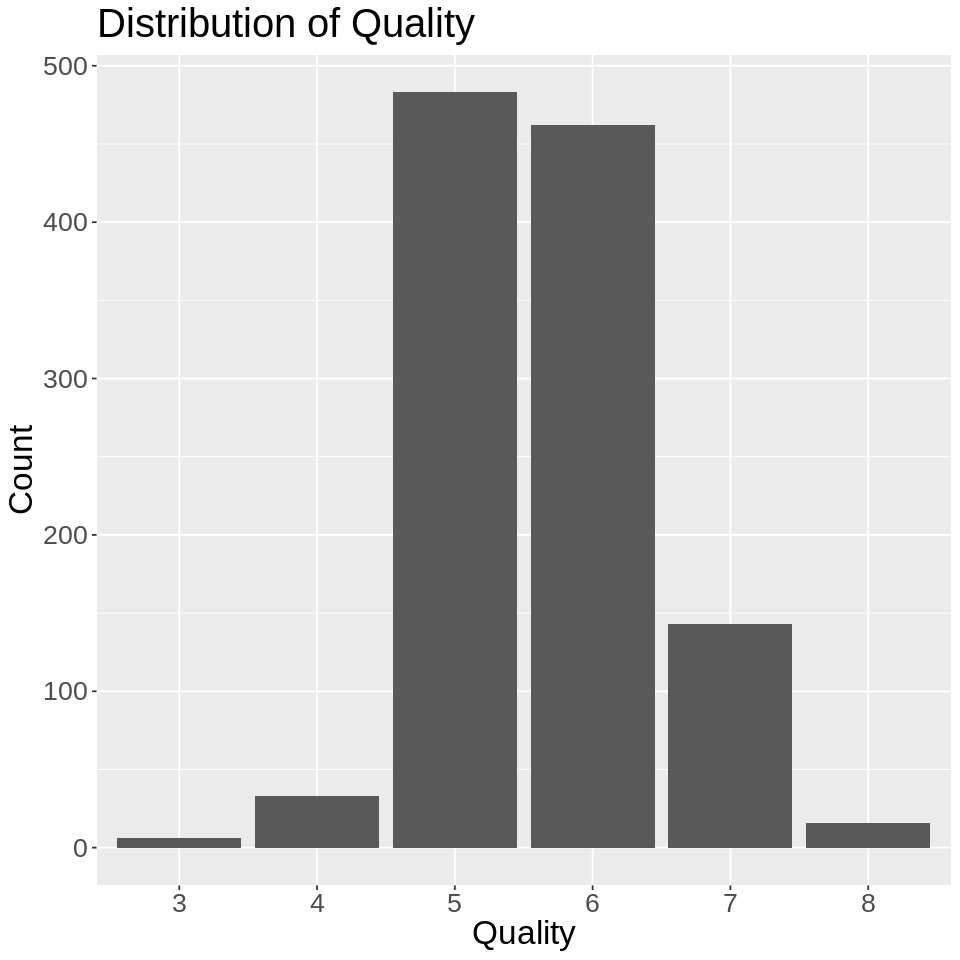

In [4]:
#This graph shows that the dataset includes many more medium quality wines than it does very good or very bad quality wines. 
#We may need to upsample to deal with this
options(repr.plot.width = 8, repr.plot.height = 8)
bar_overall <- wine%>%
                ggplot(aes(x = quality))+
                geom_bar(stat= "count")+
                labs(x = 'Quality', title = "Distribution of Quality", y = "Count")+
                theme(text = element_text(size = 20))
bar_overall

This functions runs a **ggpairs** and **ggcorr** analysis to figure out which variables show greatest correlation

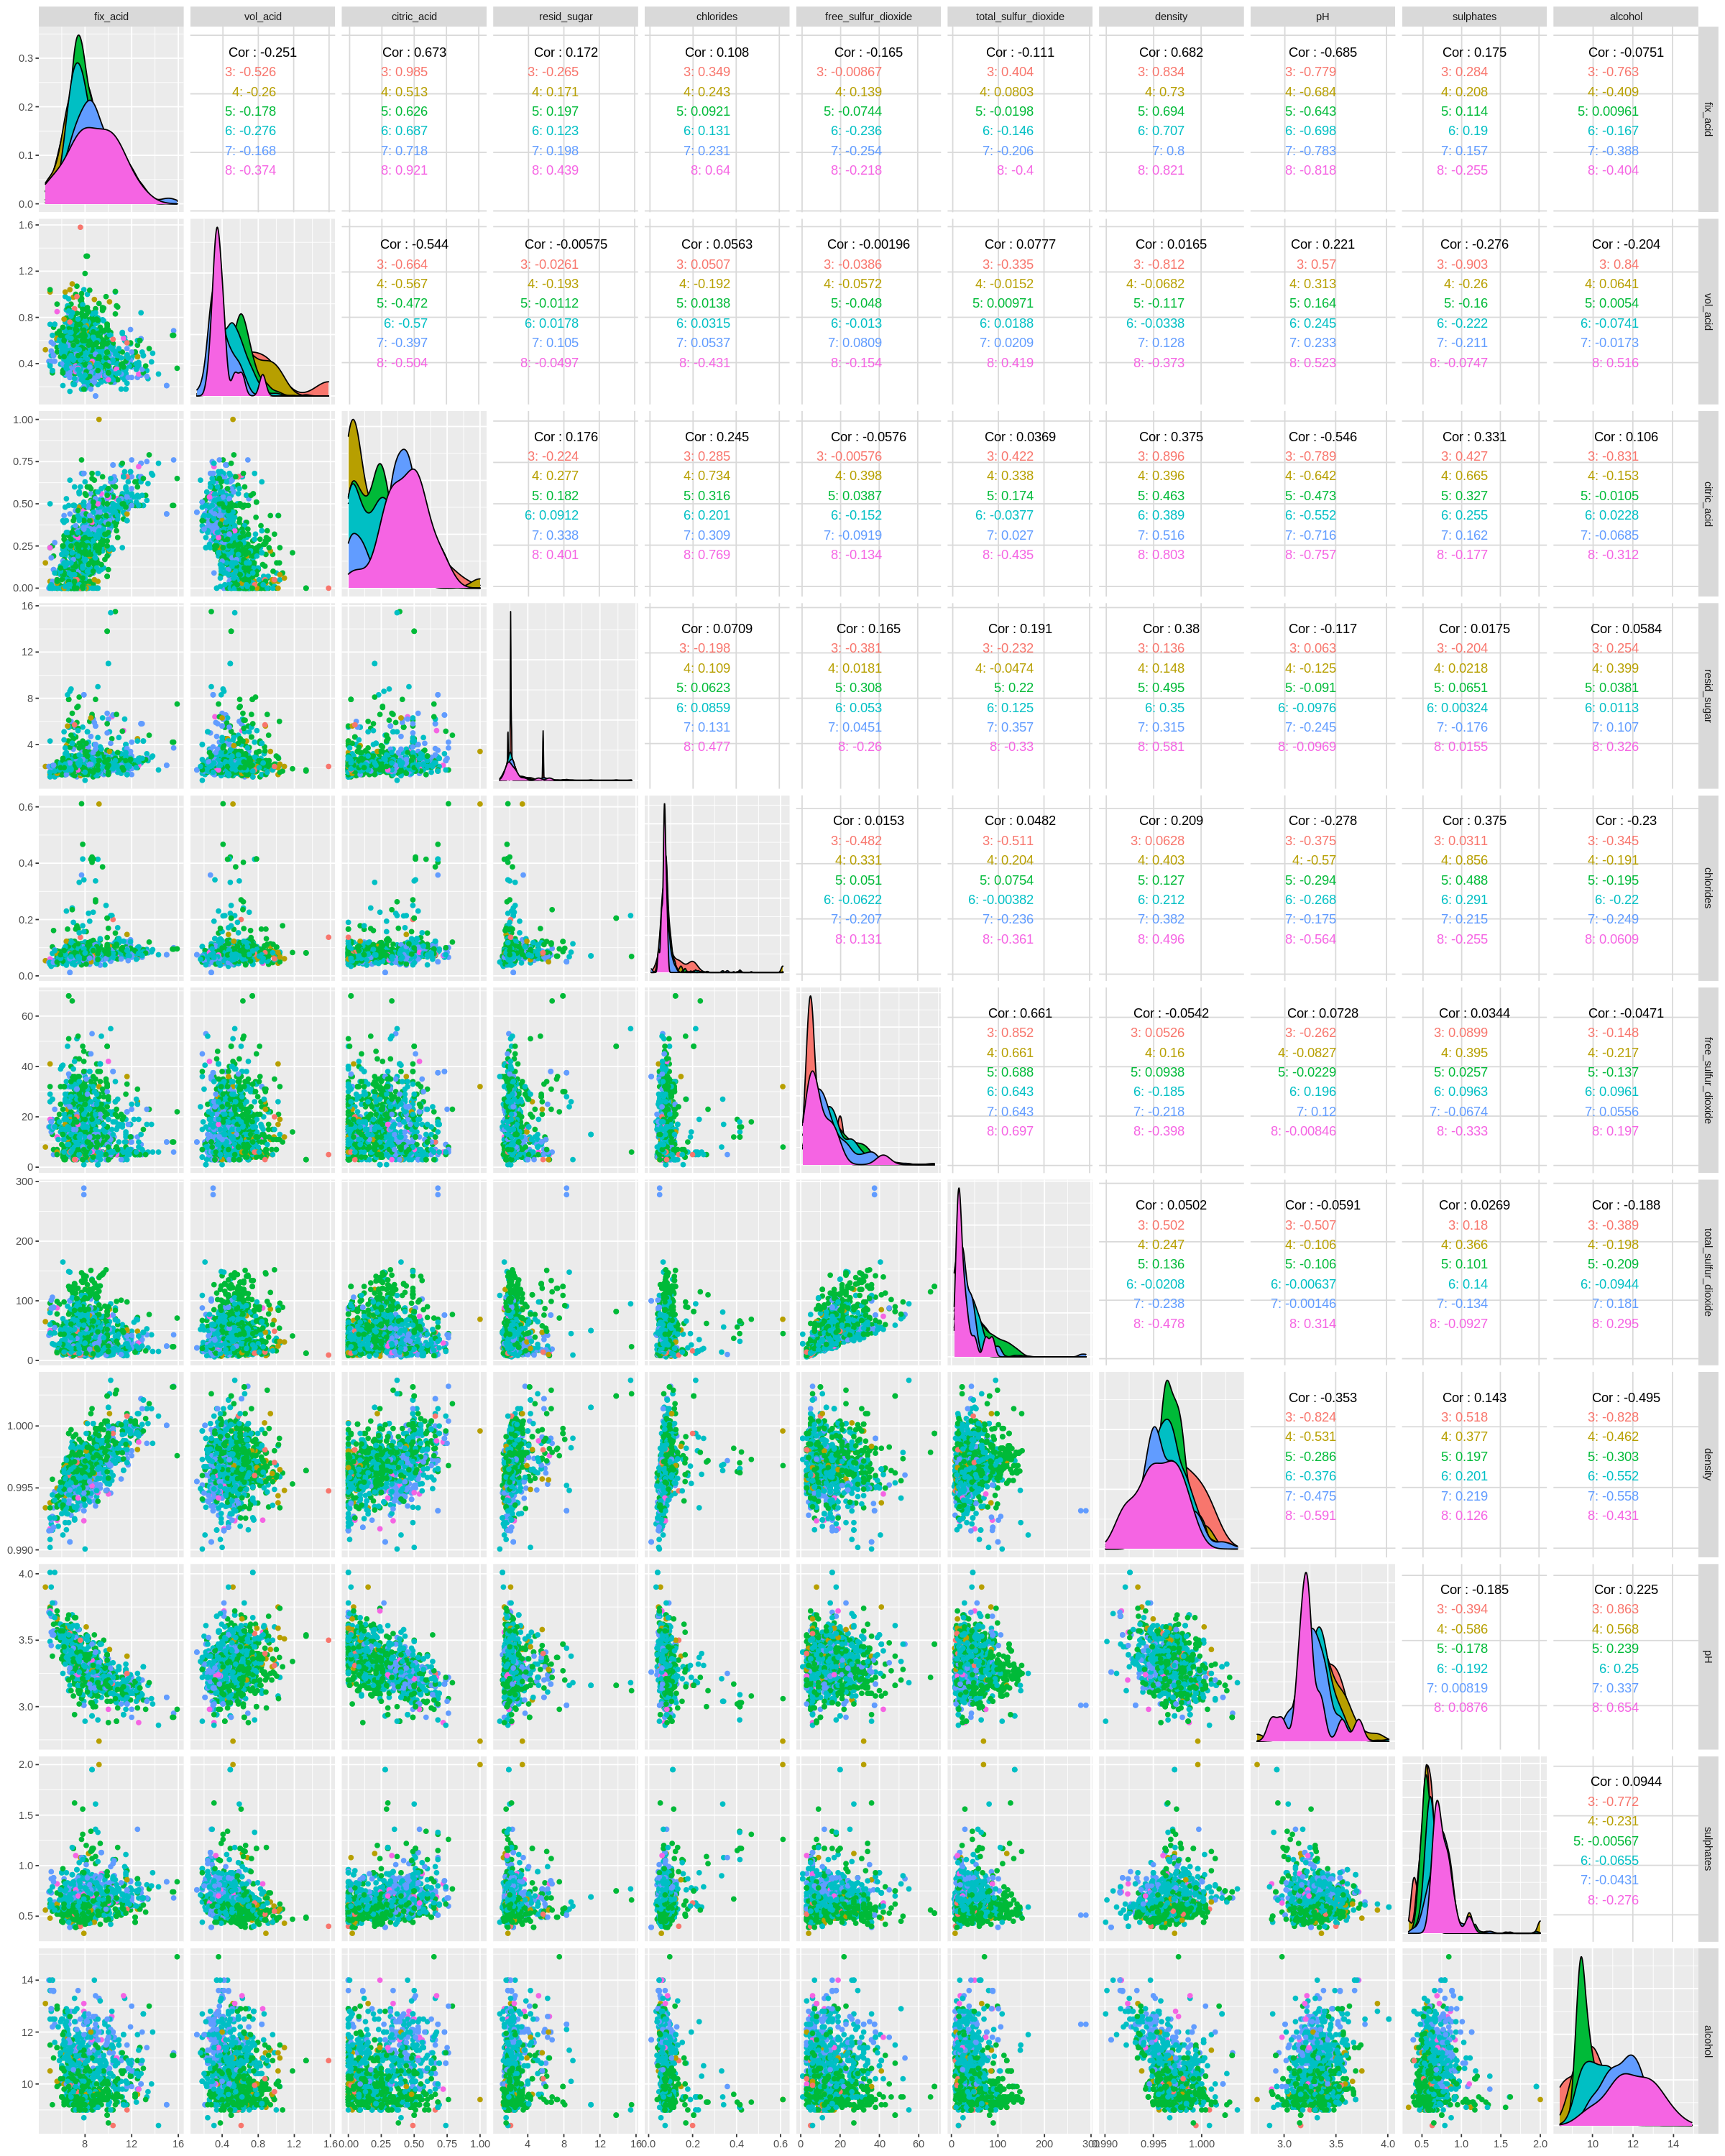

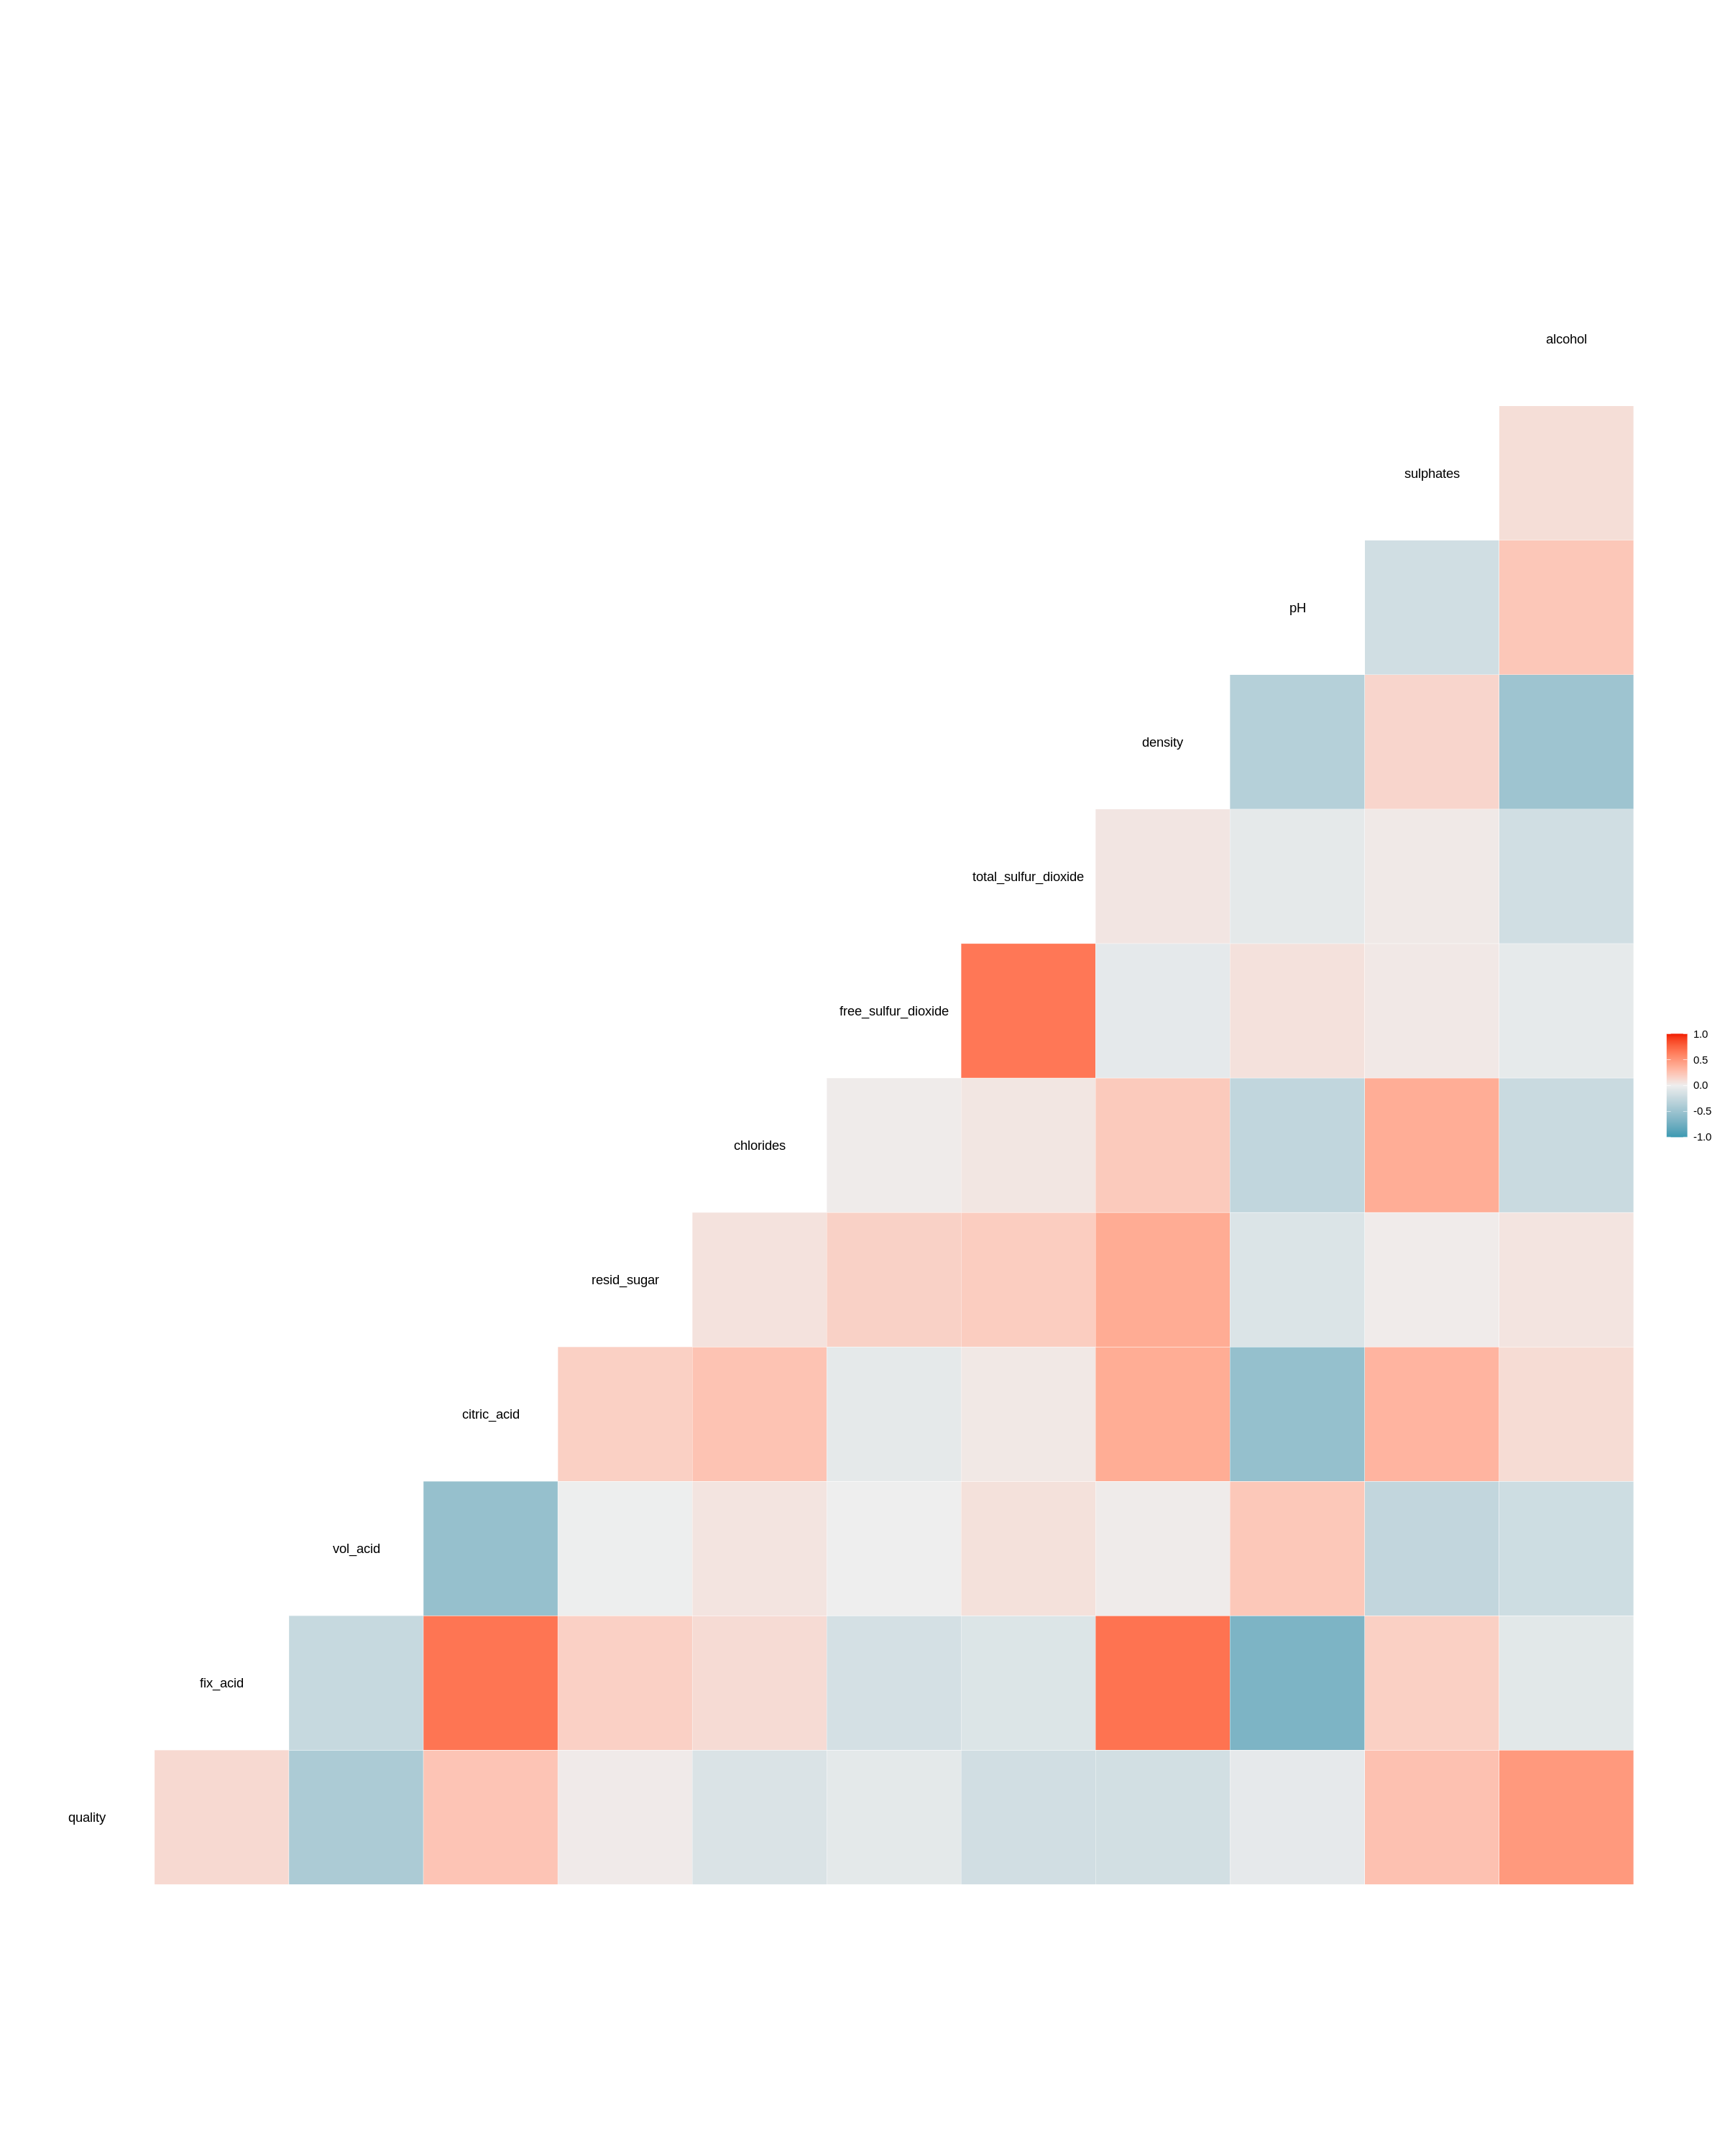

In [5]:
options(repr.plot.width = 20, repr.plot.height = 25)
wine_correlation <- wine%>%
                    ggpairs(ggplot2 ::aes(color = quality, bins = 15),columns = 2:12)
wine_correlation
corr <- wine %>%
        mutate(quality = as.numeric(quality))%>%
        ggcorr(method = c("everything", "pearson")) 
corr

GGpairs is a function that creates a graph that plot sscatter plots of all variables together. It shows which variables have correlations together. 

The GGPAIRS graph shows the following correlations: 
1. Fixed Acid - Citric Acid 
2. Fixed Acid - Density 
3. Fixed Acid - pH
4. Free Sulfur Dioxide - Total Sulfur Dioxide 


GGcorr is a function that puts GGpairs in a more visually pleasing view - darker colors represent stronger correlations. 

The GGCORR graph shows that the following variables show the greatest correlation with Quality
 1. Citric Acid 
 2. Fixed Acid
 3. Total Sulfur Dioxide
 4. Free Sulfur Dioxide 
 5. Sulphates 
 6. Alcohol 
 7. Volatile Acidity
 
Using the data that we have and the hypothesis foundation from the previous research, the following variables are chosen:

In [6]:
wine_summarize <- wine%>% 
               group_by(quality)%>%
               summarise(vol_acid_avg = mean(vol_acid), 
                         alcohol_avg = mean(alcohol),
                         total_sulfur_dioxide_avg = mean(total_sulfur_dioxide),
                         sulphates_avg = mean(sulphates), 
                         density_avg = mean(density), 
                         count = n())                       
#The quality distribution falls into the Gaussian normal distribution
#We see that median volatile acidity decreases as quality increases, while median alcohol content and total sulpher dioxide increase with quality
wine_summarize

`summarise()` ungrouping output (override with `.groups` argument)



quality,vol_acid_avg,alcohol_avg,total_sulfur_dioxide_avg,sulphates_avg,density_avg,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.8975000,9.691667,24.50000,0.5500000,0.9976817,6
4,0.7000000,10.260606,40.60606,0.6378788,0.9966694,33
5,0.5852795,9.902277,55.29917,0.6133747,0.9970727,483
6,0.5049567,10.655339,39.94156,0.6765368,0.9966095,462
7,0.3936713,11.482634,37.48951,0.7435664,0.9960708,143
8,0.4100000,11.937500,29.37500,0.7662500,0.9955531,16


Summarizing the dataset by Quality and finding the mean value is used to check the average differences in key variables

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



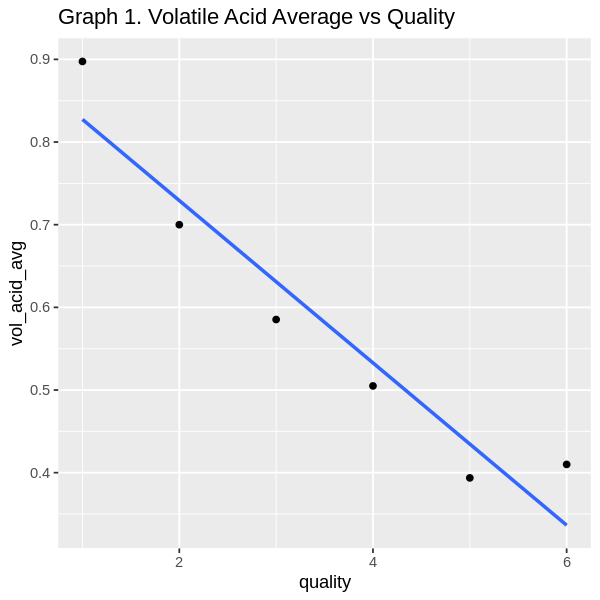

`geom_smooth()` using formula 'y ~ x'



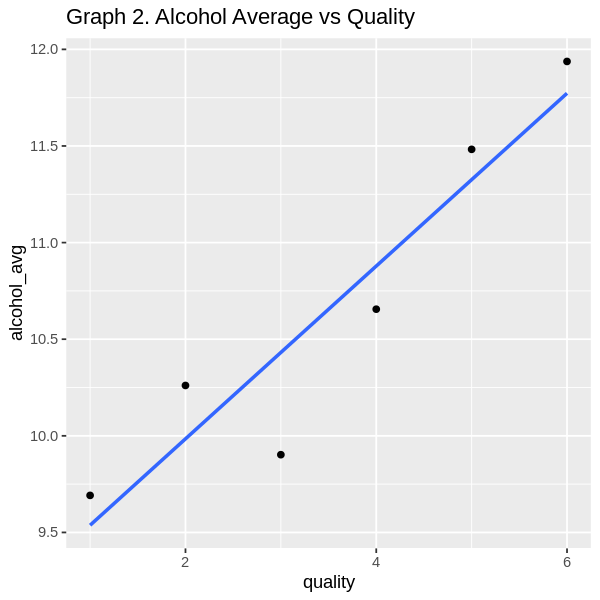

`geom_smooth()` using formula 'y ~ x'



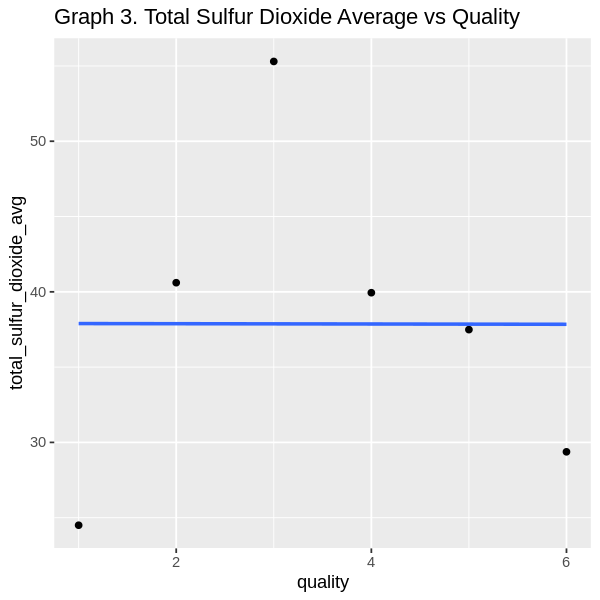

`geom_smooth()` using formula 'y ~ x'



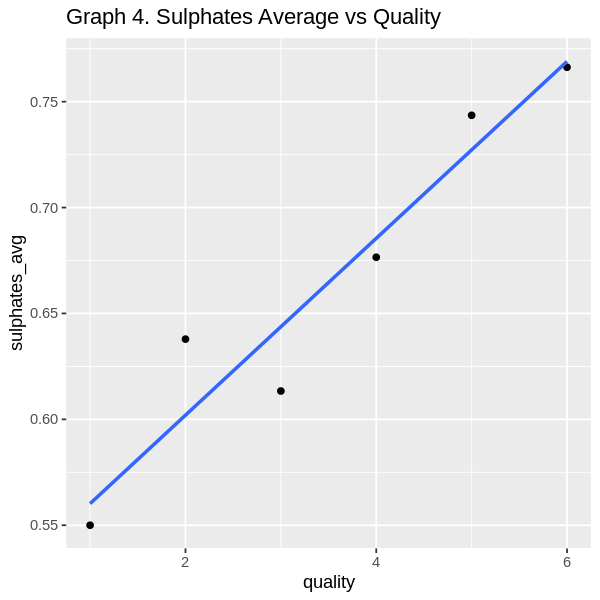

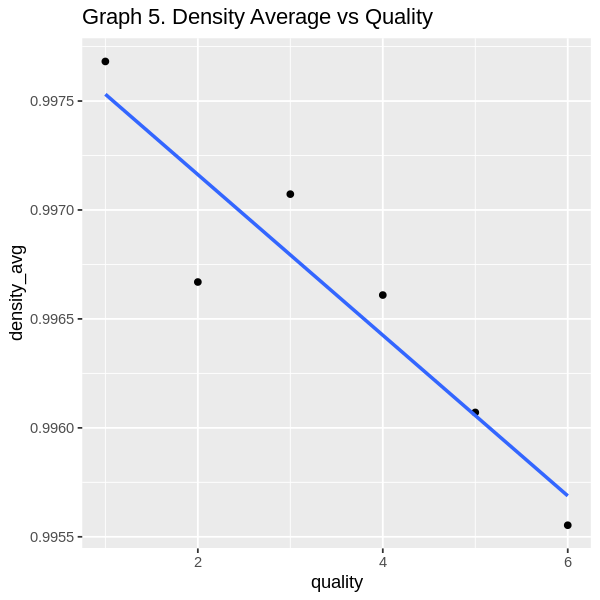

In [7]:
#visualization of the above table. All predictors appear to have some correlation to quality
options(repr.plot.width = 5, repr.plot.height = 5)
#In order to draw the line of best fit, quality needs to be readjusted back to numeric category 
wine_sum_num <- wine_summarize %>%
                mutate(quality = as.numeric(quality))

vol_acid_graph <- ggplot(wine_sum_num, aes(x=quality, y=vol_acid_avg))+
    geom_point()+
    ggtitle("Graph 1. Volatile Acid Average vs Quality")+
    geom_smooth(method = 'lm', se = FALSE)
vol_acid_graph

alcohol_graph <- ggplot(wine_sum_num, aes(x=quality, y=alcohol_avg))+
    geom_point()+
     ggtitle("Graph 2. Alcohol Average vs Quality")+
     geom_smooth(method = 'lm', se = FALSE)
alcohol_graph 

total_sulfer_dioxide_graph <- ggplot(wine_sum_num, aes(x=quality, y=total_sulfur_dioxide_avg))+
    geom_point()+
 ggtitle("Graph 3. Total Sulfur Dioxide Average vs Quality")+
 geom_smooth(method = 'lm', se = FALSE)
total_sulfer_dioxide_graph

sulphates_graph <- ggplot(wine_sum_num, aes(x=quality, y=sulphates_avg))+
    geom_point()+
     ggtitle("Graph 4. Sulphates Average vs Quality")+
 geom_smooth(method = 'lm', se = FALSE)
sulphates_graph

density_graph <- ggplot(wine_sum_num, aes(x=quality, y=density_avg))+
    geom_point()+
     ggtitle("Graph 5. Density Average vs Quality")+
 geom_smooth(method = 'lm', se = FALSE)
density_graph


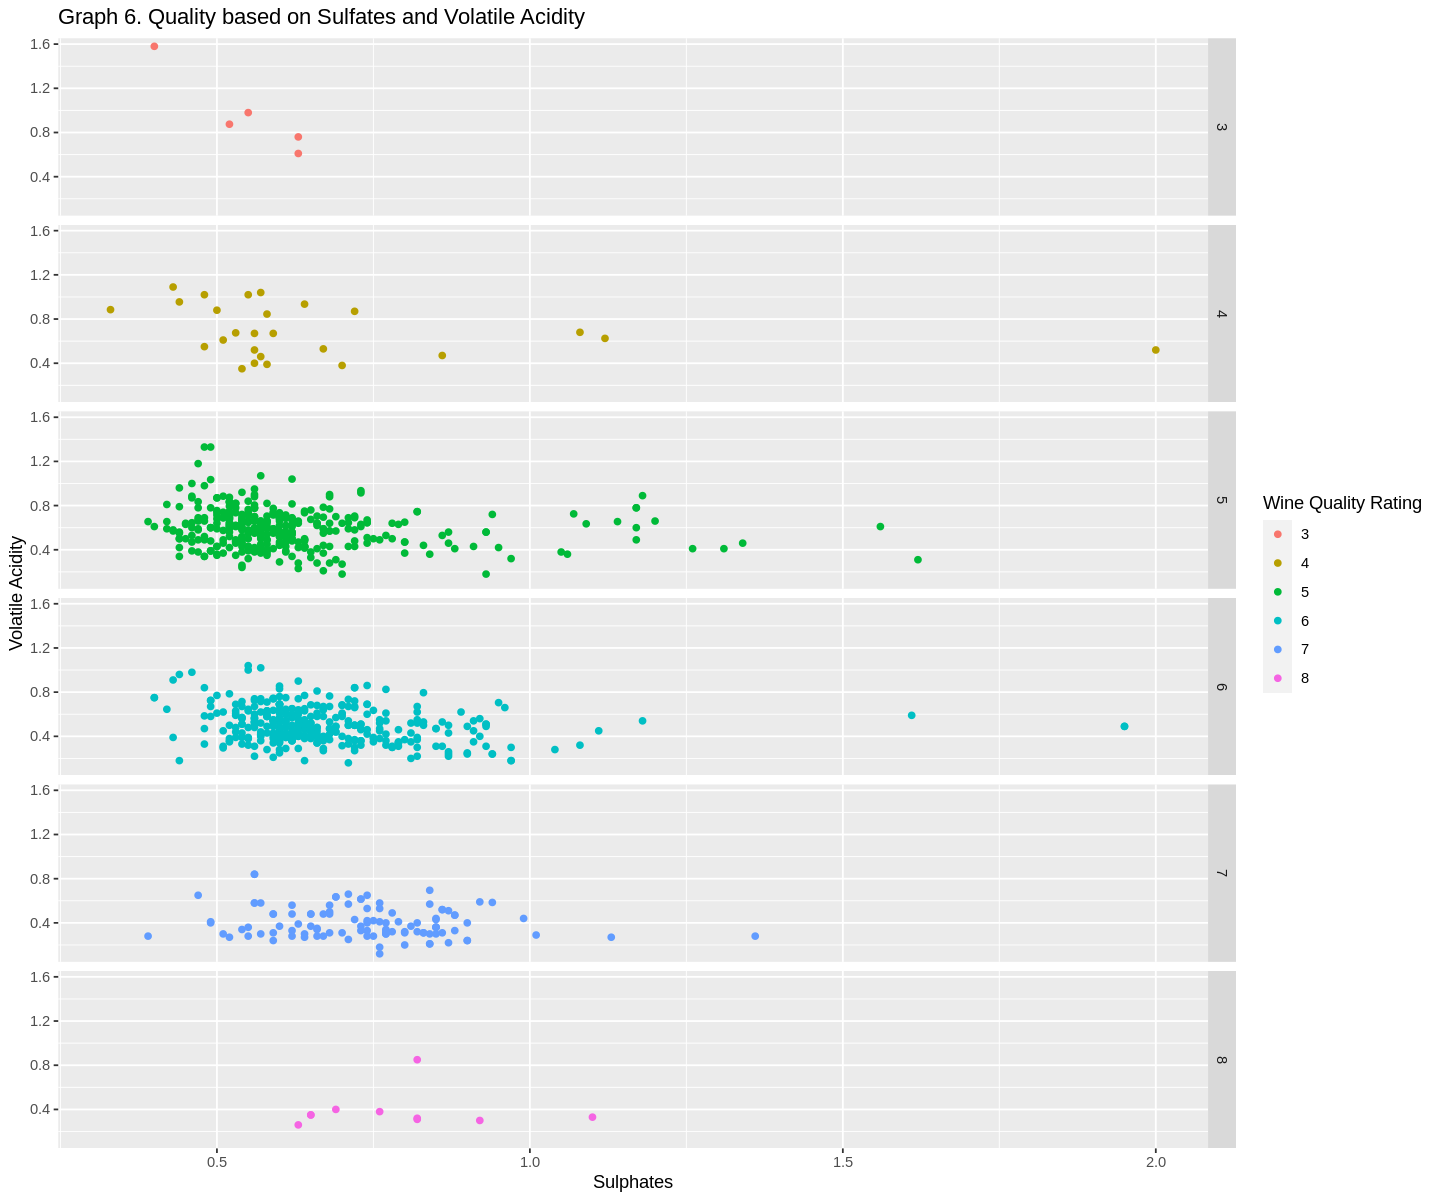

In [8]:
#Graph of volatile acid vs sulphates showing how these chemicals vary with the quality of the wine.
#Sulphates appear to increase in higher quality wine, while volatile acid appears to decrease with quality
options(repr.plot.width = 12, repr.plot.height = 10)

data_visualization <- wine_train %>%
                     ggplot(aes(y = vol_acid, x = sulphates, color = quality))+
                     geom_point()+
                     labs(x="Sulphates", y="Volatile Acidity", color= "Wine Quality Rating")+
                     facet_grid(rows = vars(quality))+
                     ggtitle("Graph 6. Quality based on Sulfates and Volatile Acidity")

data_visualization

In [9]:
#Create model
wine_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [10]:
#create recipe
wine_recipe <- recipe(quality ~ vol_acid + alcohol + sulphates + density + total_sulfur_dioxide, data = wine_train)%>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors()) 

wine_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          5

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [18]:
#5 fold cross validation
set.seed(1234)
cross_val_data <- vfold_cv(wine_train, v=5, strata=quality)

#create grid specifications
sequence <- tibble(neighbors = seq(from=1, to=40, by=2))

In [25]:
#tune grid
set.seed(1234)
determining_k <- workflow()%>%
    add_recipe(wine_recipe)%>%
    add_model(wine_model)%>%
    tune_grid(resamples=cross_val_data, grid=sequence)%>%
    collect_metrics()%>%
    filter(.metric=="accuracy")

determining_k


! Fold5: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5757872,5,0.006128582,Model01
3,accuracy,multiclass,0.5617243,5,0.013010902,Model02
5,accuracy,multiclass,0.5419769,5,0.008418389,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
35,accuracy,multiclass,0.5736116,5,0.01603401,Model18
37,accuracy,multiclass,0.5724422,5,0.01663208,Model19
39,accuracy,multiclass,0.5724149,5,0.01377504,Model20


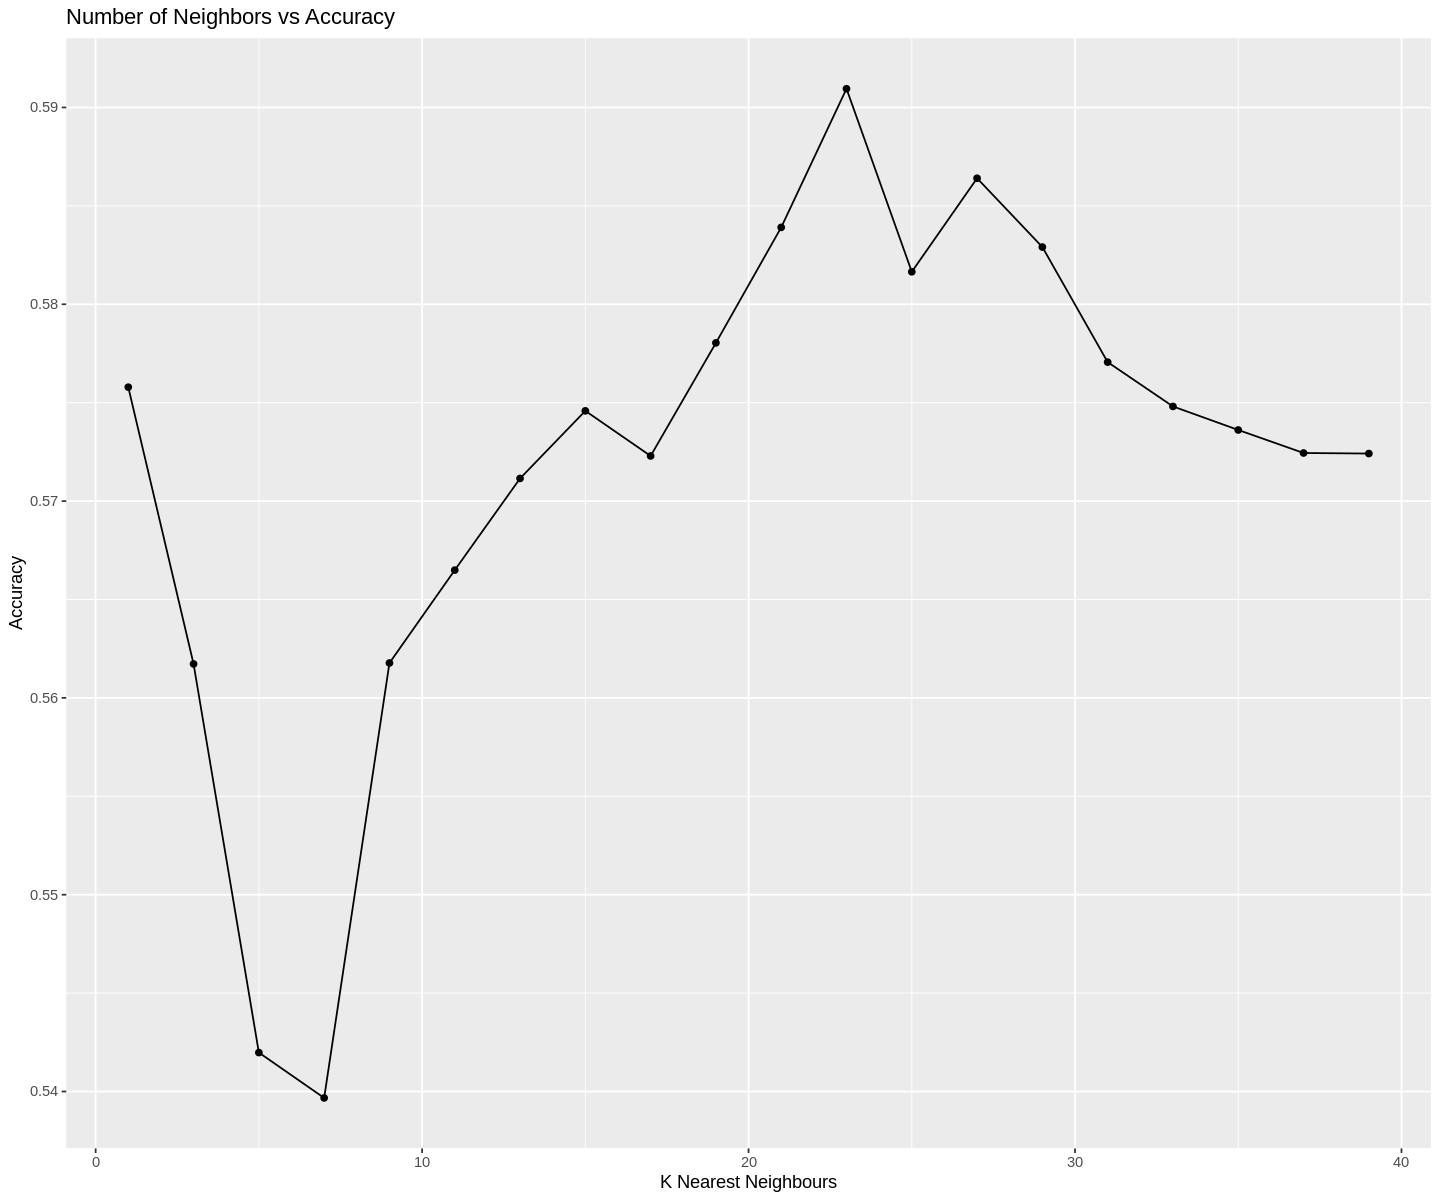

In [31]:
#graphs K vs accuracy to find best K

best_k <- ggplot(determining_k, aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    labs(x="K Nearest Neighbours", y="Accuracy")+
    ggtitle("Number of Neighbors vs Accuracy")
best_k
#best K is 24

In [49]:
set.seed(1234)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 24)%>%
  set_engine("kknn")%>%
  set_mode("classification")

knn_fit <- workflow()%>%
  add_recipe(wine_recipe)%>%
  add_model(knn_spec)%>%
  fit(data = wine_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~24, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3974359
Best kernel: rectangular
Best k: 24

In [50]:
set.seed(1234)
wine_test_predictions <- predict(knn_fit, wine_test)%>%
                         bind_cols(wine_test)

wine_test_predictions

.pred_class,quality,fix_acid,vol_acid,citric_acid,resid_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,5,7.6,0.390,0.31,2.3,0.082,23,71,0.9982,3.52,0.65,9.7
5,6,7.8,0.645,0.00,2.0,0.082,8,16,0.9964,3.38,0.59,9.8
5,5,8.3,0.655,0.12,2.3,0.083,15,113,0.9966,3.17,0.66,9.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,6,6.2,0.70,0.15,5.1,0.076,13,27,0.99622,3.54,0.60,11.9
5,5,6.2,0.46,0.29,2.1,0.074,32,98,0.99578,3.33,0.62,9.8
6,6,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0


In [51]:
set.seed(1234)
wine_test_predictions%>%
  metrics(truth = quality, estimate = .pred_class)%>%
  filter(.metric == "accuracy")

confusion <- wine_test_predictions%>%
             conf_mat(truth = quality, estimate = .pred_class)

confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6070175


          Truth
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  1  5 82 36  2  0
         6  0  2 36 73 15  5
         7  0  0  0  9 18  1
         8  0  0  0  0  0  0

# Discussion

1. Results 
Results of the model is the accuracy wih which it could predict the quality of Wine based on the main 5 variables. The accuracy turned out to be at 61%, which is not too bad considering that it predicts a value from 10 options (compared to True-False response). A low accuracy was somewhat expected, as the valuations of quality are subjective and based on expertise valuation. Nonetheless, this model, even if not accurately predict, would allow pro get a rough estimate of the quality of wine. 

2. Implications 
This model would allow winemakers to more accurately evaluate their wine quality and price their wine accordingly. There would be a lower difference between price and quality in the wine industry, as customers would stop buying overpriced wine and winemakers would raise prices for quality wine. 

3. Future Research 
As the dataset did not mention price of each wine, finding prices and seeing whether there is a great difference in price range and quality. A possible research question could be: After which price point there is seen little change in wine quality? Our results may lead to further questions such as “how well does wine quality correlate to price?” and “how much do the optimum levels of predictors change with different types of wine, for example pinot versus cabernet?”



## Reference 


Nimit Dhalia “The Effect of Physicochemical on The Wine Quality”
https://rpubs.com/nimit/Report

Dataset 
Wine Quality Dataset 
M Yasser H 
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset


Nuriel Shalom Mor - Wine Quality and Type Prediction
Wine Quality and Type Prediction from Physicochemical Properties Using Neural Networks for Machine Learning: A Free Software for Winemakers and Customers